In [ ]:
import requests

url = "https://www.searchapi.io/api/v1/search"
params = {
  "engine": "google_jobs",
  "q": "AI Engineer in New York",
  "api_key": ""
}

response = requests.get(url, params=params)
print(response.text)

In [ ]:
#Get a python list of all the tech companies
# The job title a variable
# Add location as another parameter

#"Data Engineer United States Meta"
#"{job_title} {location} {company name}"
# df

In [3]:
company_names = [
    "Apple",
    "Microsoft",
    "Amazon",
    "Google",
    "Meta",
    "Tesla",
    "Visa",
    "Mastercard",
    "JPMorgan Chase",
    "Bank of America",
    "Wells Fargo",
    "Intel",
    "Cisco",
    "Oracle",
    "Salesforce",
    "Adobe",
    "IBM",
    "NVIDIA",
    "Dell",
    "PayPal",
    "Qualcomm",
    "AMD",
    "Netflix",
    "Uber",
    "Square",
    "Zoom",
    "Airbnb",
    "Shopify",
    "Snowflake",
    "Coinbase",
    "Stripe",
    "Goldman Sachs",
    "Morgan Stanley",
    "Citigroup",
    "Charles Schwab",
    "American Express",
    "Robinhood",
    "DoorDash",
    "Cloudflare",
    "Atlassian",
    "ServiceNow",
    "CrowdStrike",
    "Palantir",
    "Spotify",
    "Lyft",
    "Snapchat",
    "Pinterest",
    "LinkedIn",
    "Slack",
    "GitHub"
]

len(company_names)

50

In [5]:
import requests
import pandas as pd
import time

job_title = "Data Engineer"
location = "United States"

all_jobs_df = pd.DataFrame()

url = "https://www.searchapi.io/api/v1/search"
api_key = "ieKtWDELsqoGRMQ4DbCaKTEq"  # Replace with your actual API key

for company in company_names:
    query = f"{job_title} {location} {company}"
    params = {
        "engine": "google_jobs",
        "q": query,
        "api_key": api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        job_listings = data.get('jobs', [])
        jobs_df = pd.DataFrame(job_listings)
        all_jobs_df = pd.concat([all_jobs_df, jobs_df], ignore_index=True)
    else:
        print(f"Error: Received status code {response.status_code} for company {company}")
    time.sleep(1)

print(all_jobs_df)


     position                                              title  \
0           1                                      Data Engineer   
1           2                                      Data Engineer   
2           3        Advanced Analytics Data Engineer, AppleCare   
3           4  Senior Data Engineer- Worldwide Developer Rela...   
4           5                             Clinical Data Engineer   
..        ...                                                ...   
424         9  Senior Migration Engineer (Slack to Teams Tran...   
425        10        Advanced Machine Learning Software Engineer   
426         1  Junior Data Scientist /Data Analyst with power...   
427         2                          Github Migration Engineer   
428         3                          Github Migration Engineer   

                company_name                   location                   via  \
0                      Apple                 Austin, TX  via Careers At Apple   
1                    

In [12]:
all_jobs_df["title"].tolist()

['Data Engineer',
 'Data Engineer',
 'Advanced Analytics Data Engineer, AppleCare',
 'Senior Data Engineer- Worldwide Developer Relations',
 'Clinical Data Engineer',
 'Data Infrastructure/Platform Engineer for Lakehouse, ASE',
 'Software Engineer - Big Data Technologies',
 'Software Engineer (BI Tools Platform), Ai & Data Platforms',
 'Apple Music Data Engineering Software Engineer Job at Apple in Seattle',
 'Software Engineer (AI/ML), Ai & Data Platforms',
 'Senior Data Engineer - Cloud Architect',
 'Principal Software Engineering Manager - Azure Storage',
 'Azure Senior Data Engineer',
 'Azure Data Engineer - West Region',
 'Data Engineer (AWS, Azure, GCP)',
 'Azure Data Engineer',
 'Microsoft Azure Cloud Engineer/Developer',
 'Azure Data Engineer - SQL Server Development is MUST',
 'Data Engineering Expert',
 'Azure Data Engineer',
 'Data Engineer, Amazon Publisher Monetization, Analytics',
 'DATA ENGINEER II, AWS Data Platform',
 'Data Engineer - Amazon Go, JWO Tech',
 'Data Engin

In [18]:
all_jobs_df.to_csv("all_jobs.csv")

In [21]:
all_jobs_df.drop(columns=["position"])
all_jobs_df.to_csv("all_jobs.csv")

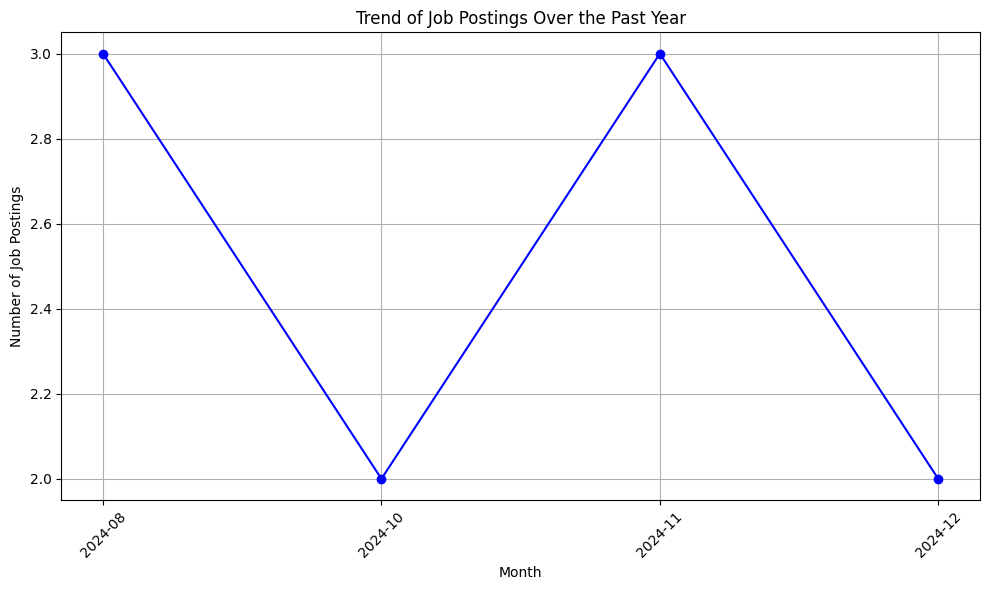

In [23]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('all_jobs.csv')

# Extract posting dates from descriptions
dates = data['description'].str.extract(r'Posted: (\w+ \d{1,2}, \d{4})')
dates = pd.to_datetime(dates[0], format='%b %d, %Y', errors='coerce')

# Filter dates for the past year
one_year_ago = datetime.now() - pd.DateOffset(years=1)
filtered_dates = dates[dates >= one_year_ago]

# Count postings per month
postings_per_month = filtered_dates.dt.to_period('M').value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(postings_per_month.index.astype(str), postings_per_month.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Job Postings Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
